# ABEL HiPACE++ example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
from abel import *
%load_ext autoreload
%autoreload 2

### Define the input beams

In [2]:
# define drive bunch
driver = SourceBasic()
driver.charge = -2e-9 # [C]
driver.energy = 14e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 20e-6 # [m]
driver.z_offset = 100e-6 # [m]
driver.emit_nx, driver.emit_ny = 20e-6, 20e-6 # [m rad]
driver.beta_x, driver.beta_y = 1.0, 1.0 # [m]
driver.num_particles = 400000
driver.symmetrize = True
driver.x_angle = 10e-6 # [rad]
driver.y_offset = 1e-6 # [m]

# define stage
stage = StageHipace()
stage.driver_source = driver
stage.nom_accel_gradient = 7e9 # [m]
stage.plasma_density = 1e22 # [m^-3]
stage.nom_energy_gain = 14e9
stage.ion_motion = True
stage.ion_species = 'He'
stage.beam_ionization = False
stage.external_focusing_radial = 470 # [T/m]

# define witness bunch
source = SourceBasic()
source.charge = -0.6e-9 # [C]
source.energy = 25e9 # [eV]
source.rel_energy_spread = 0.01
source.bunch_length = 10e-6 # [m]
source.z_offset = -160e-6 # [m]
source.emit_nx, source.emit_ny = 10e-6, 10e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 100000

# define linac
linac = PlasmaLinac()
linac.source = source
linac.stage = stage
linac.num_stages = 1

### Perform linac tracking

In [3]:
# perform experiment tracking
linac.stage.num_nodes = 16
beam = linac.run('hipace_example', overwrite=True)

Tracked #0  SourceBasic             (s =    0.0 m) :   E =  25.0 GeV, Q = -0.60 nC, σz =  10.0 µm, σE =  1.0%, ε =  10.0/10.0 mm-mrad
>> Finished HiPACE++ (job 8268188): 100%|██████████████████████████████████| 4548/4548 [02:47<00:00, 27.15 steps/s]
    ... #1  StageHipace #1          (s =    2.0 m) :   E =  38.9 GeV, Q = -0.60 nC, σz =  10.0 µm, σE =  1.4%, ε =  10.5/15.4 mm-mrad


### Plot the wakefield

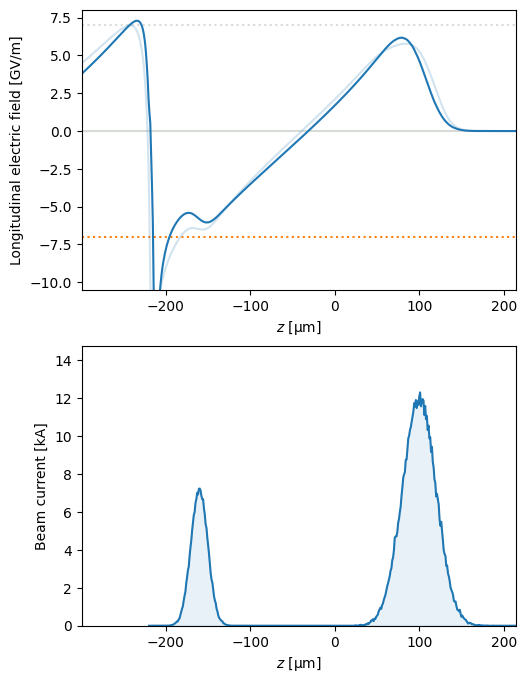

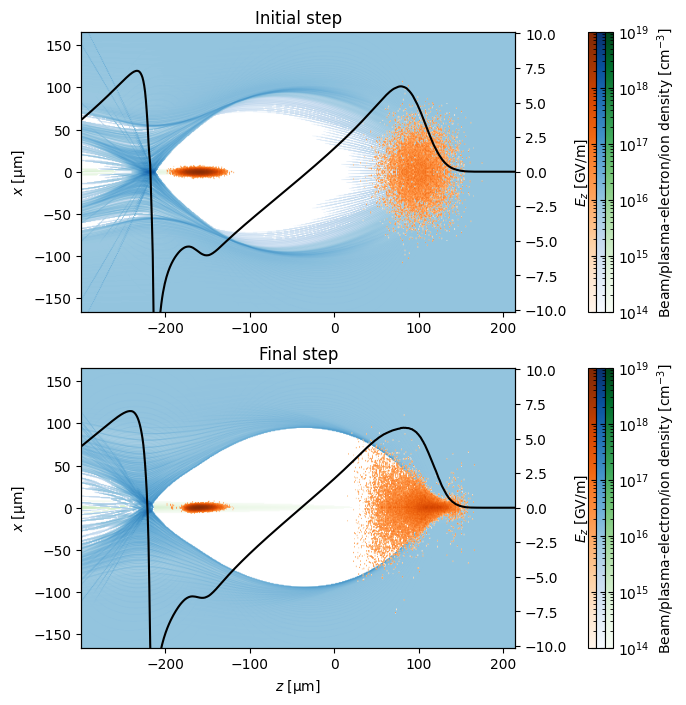

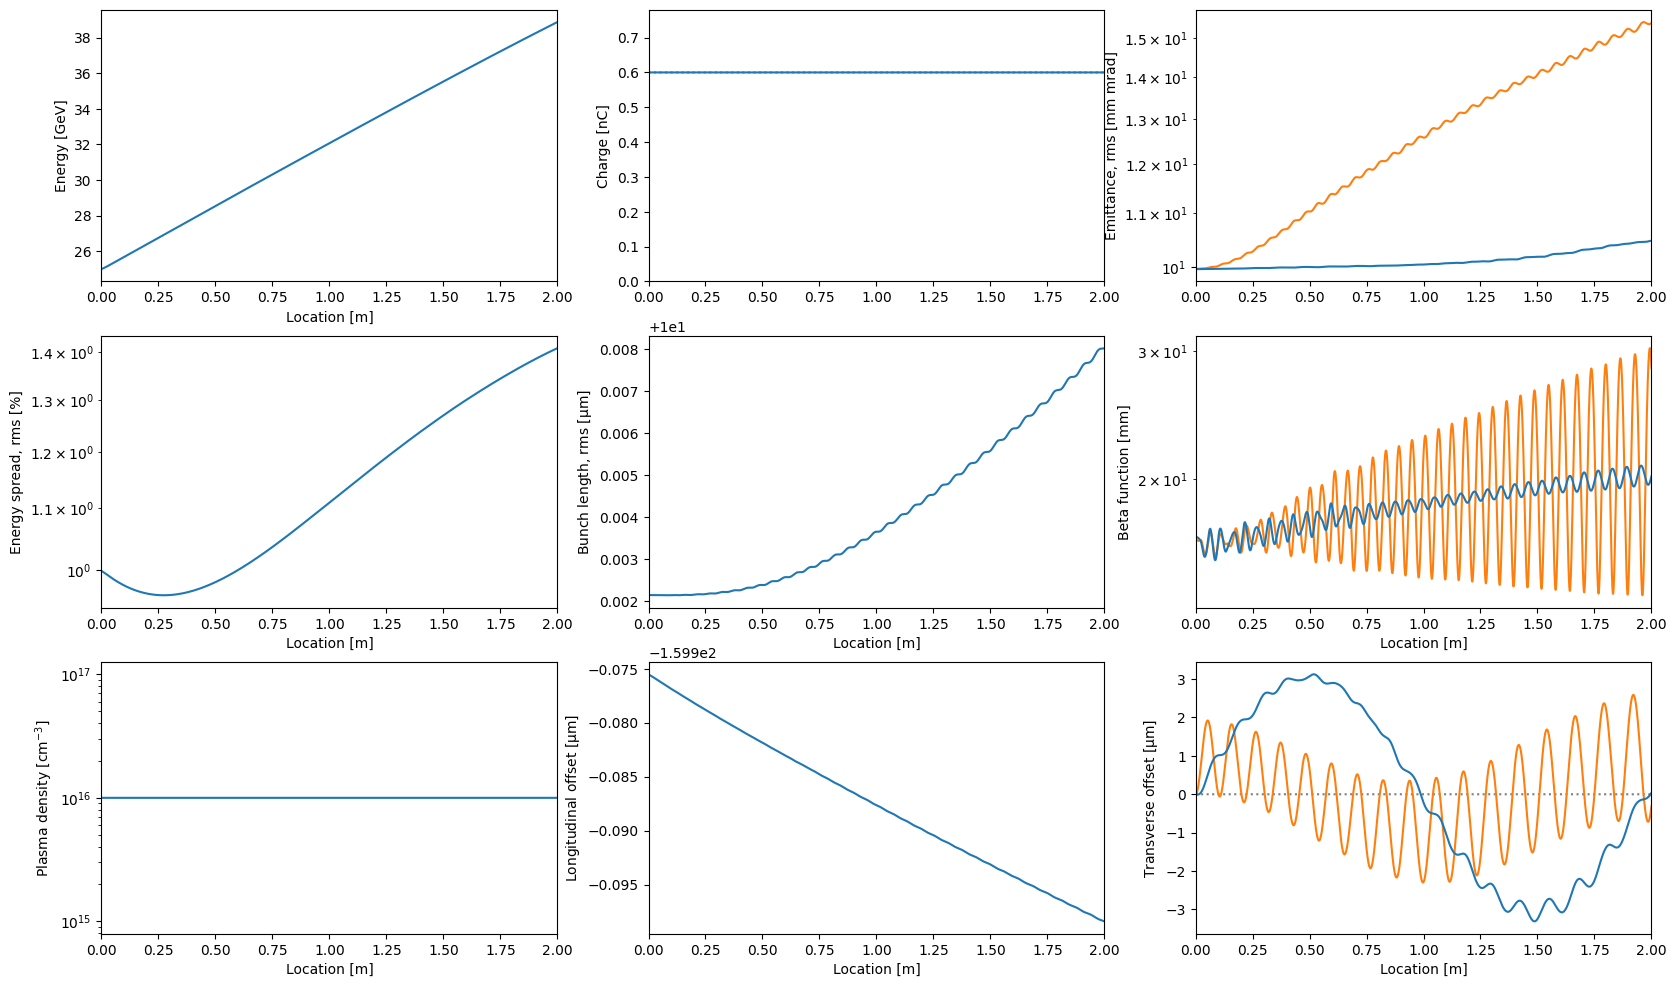

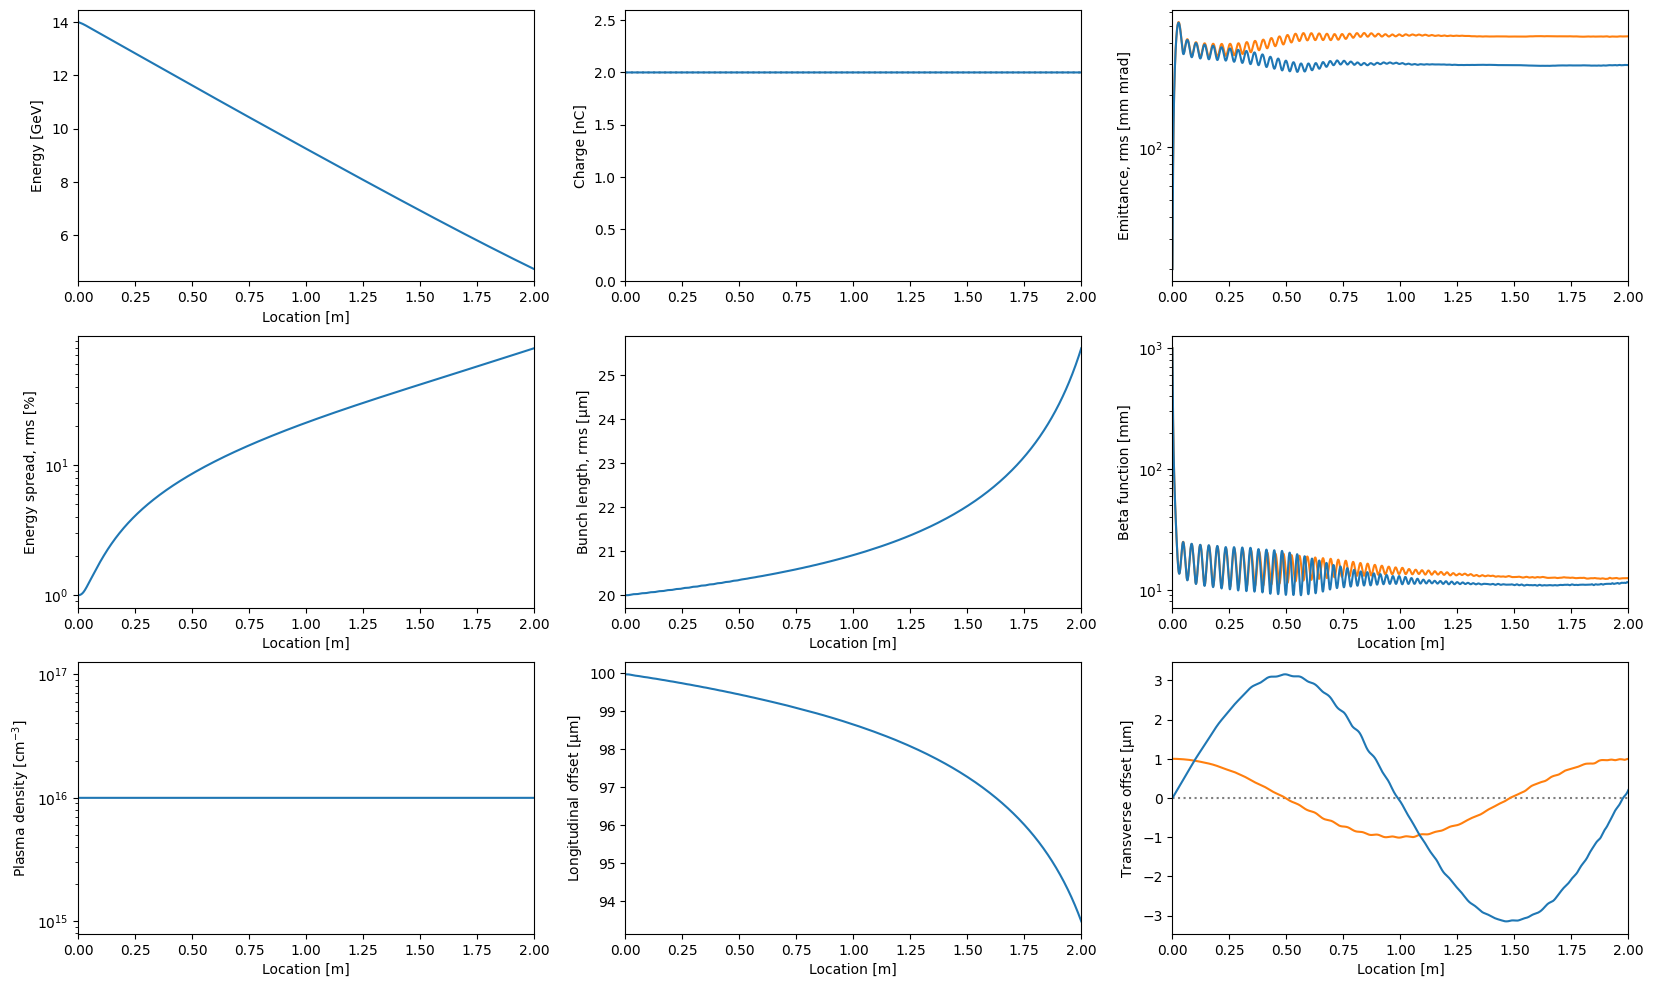

In [4]:
# plot wakefield
linac.stage.plot_wakefield()
linac.stage.plot_wake()
linac.stage.plot_evolution()
linac.stage.plot_driver_evolution()

### Plot longitudinal phase space

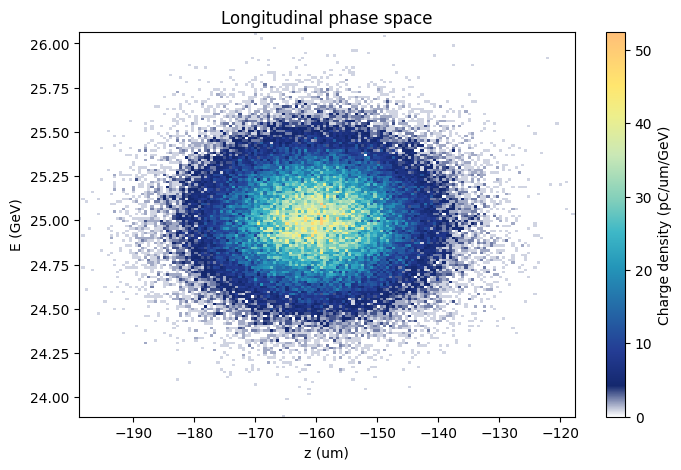

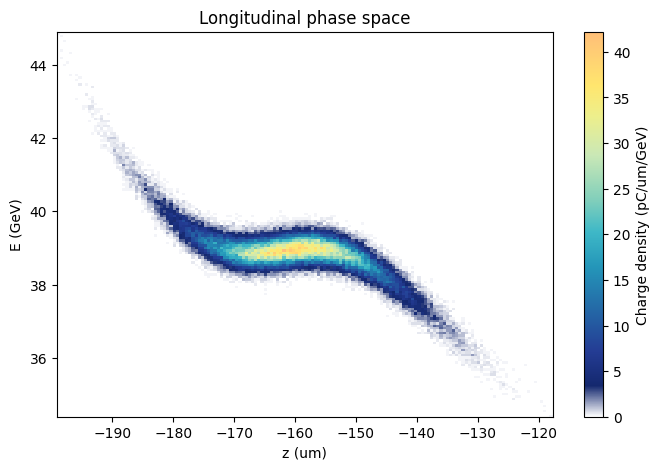

In [5]:
# plot the longitudinal phase space (at the beginning and end of the stage)
linac.initial_beam.plot_lps()
linac.final_beam.plot_lps()